## LAPTOP PRICE PREDICTION


In [102]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import VotingRegressor,StackingRegressor

In [2]:
data = pd.read_csv('/home/christine/Downloads/laptop data/laptop_data.csv')

In [3]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
data.shape

(1303, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


## Data Cleaning

In [6]:
#check for duplicates
data.duplicated().sum()

0

In [7]:
#drop the unnamed column
data.drop(columns=['Unnamed: 0'],inplace=True)


In [8]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [9]:
#strip the ram and weight column
data['Ram'] = data['Ram'].str.replace('GB','')
data['Weight'] = data['Weight'].str.replace('kg','')
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [10]:
#change the the ram and weight column from object to int and float
data['Ram'] = data['Ram'].astype('int32')
data['Weight'] = data['Weight'].astype('float32')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


## Exploratory Data Analysis

## Univariate

/home/christine/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

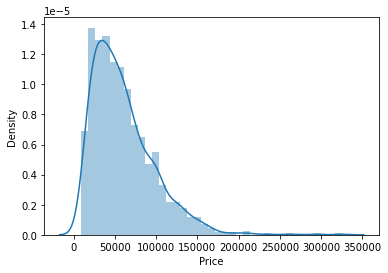

In [11]:
#the price column
sns.distplot(data['Price'])

<AxesSubplot:>

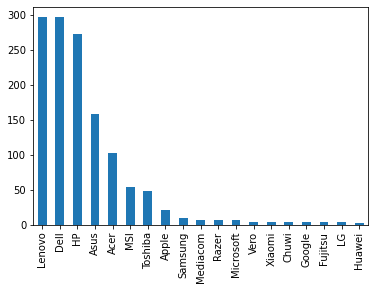

In [12]:
#the company name column
data['Company'].value_counts().plot(kind='bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

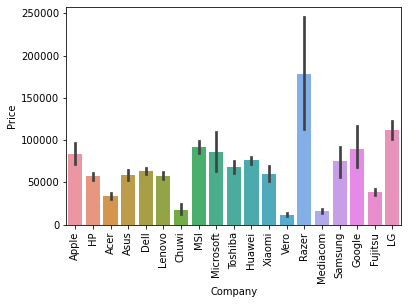

In [13]:
#pricing based on company
sns.barplot(x=data['Company'],y=data['Price'])
plt.xticks(rotation = 90)

<AxesSubplot:>

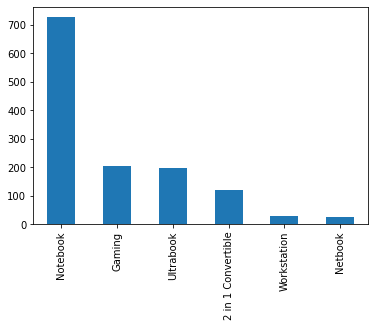

In [14]:
#the typename column
data['TypeName'].value_counts().plot(kind='bar')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

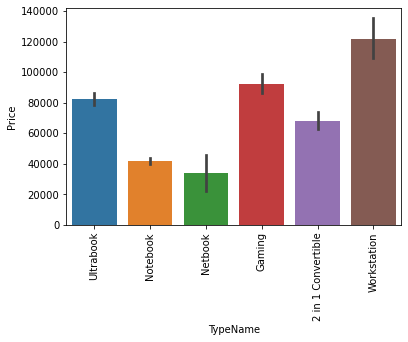

In [15]:
#compare typename and price
sns.barplot(x=data['TypeName'],y=data['Price'])
plt.xticks(rotation=90)

/home/christine/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

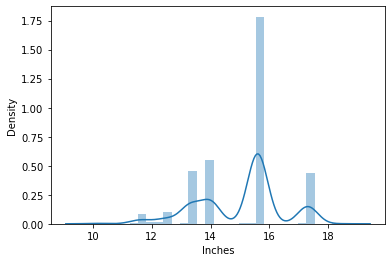

In [16]:
#the inches column
sns.distplot(data['Inches'])

<AxesSubplot:xlabel='Inches', ylabel='Price'>

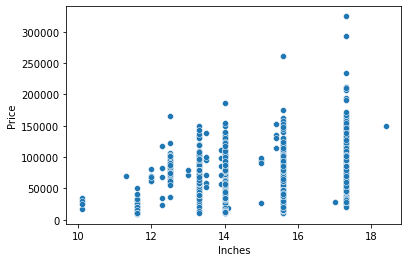

In [17]:
#compare price and Inches
sns.scatterplot(x=data['Inches'],y=data['Price'])

In [18]:
#screen resolution column
data['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [19]:
#create a new column the labels touchscreen as 1 and not touchscreen as 0
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)

In [20]:
data.tail()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64,1
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,1
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.12,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92,0
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,19660.32,0


<AxesSubplot:>

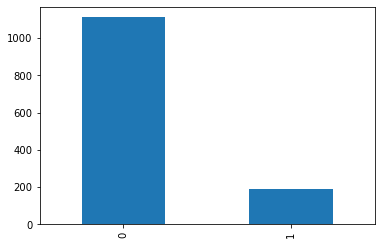

In [21]:
#value count on the touchscreen column
data['Touchscreen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

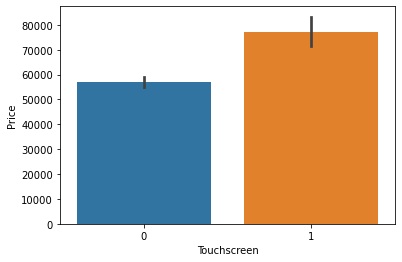

In [22]:
#compare price and touchscreen
sns.barplot(x=data['Touchscreen'],y=data['Price'])

In [23]:
#create a new column ips to for the laptops with IPS
data['IPS'] = data['ScreenResolution'].apply(lambda x : 1 if 'IPS' in x else 0)
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<AxesSubplot:>

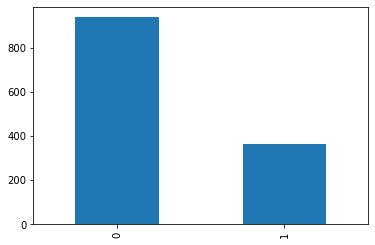

In [24]:
#value count on the IPS column
data['IPS'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='IPS', ylabel='Price'>

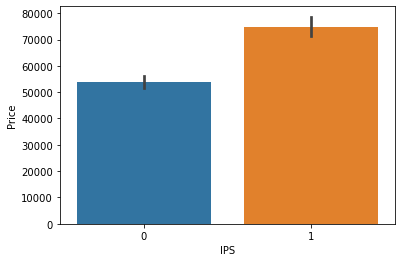

In [25]:
#compare IPS and Price
sns.barplot(x=data['IPS'],y=data['Price'])

In [26]:
new = data['ScreenResolution'].str.split('x',n=1, expand = True)

In [27]:
data['X_res'] = new[0]
data['Y_res'] = new[1]

In [28]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [29]:
data['X_res'] = data['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,1920,1080
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,3200,1800
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,1366,768


In [30]:
#change the xres column to int
data['X_res'] = data['X_res'].astype('int')
data['Y_res'] = data['Y_res'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [31]:
data.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [32]:
#calculate PPI(pixel per inches)
data['PPI'] = ((data['X_res']**2) + (data['Y_res']**2))**0.5/data['Inches'].astype('float')

In [33]:
data.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64

In [34]:
#drop the screenresolution column
data.drop(columns=['ScreenResolution'],inplace= True)


In [35]:
data.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [36]:
#drop more columns which are already represented by the ppi column
data.drop(columns=['X_res','Y_res','Inches'],inplace=True)

In [37]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [38]:
#cpu column
data['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              134
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
                                       ... 
Intel Core i5 6440HQ 2.6GHz               1
Intel Core i7 2.2GHz                      1
Intel Core i7 7500U 2.5GHz                1
Intel Pentium Dual Core N4200 1.1GHz      1
Intel Celeron Quad Core N3710 1.6GHz      1
Name: Cpu, Length: 118, dtype: int64

In [39]:
data['CpuName'] = data['Cpu'].apply(lambda x:"".join(x.split()[0:3]))
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CpuName
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,IntelCorei5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,IntelCorei5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,IntelCorei5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,IntelCorei7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,IntelCorei5


In [40]:
def fetch_processor(text):
    if text == 'IntelCorei7' or text == 'IntelCorei5' or text == 'IntelCorei3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [41]:
data['CpuBrand'] = data['CpuName'].apply(fetch_processor)

In [42]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CpuName,CpuBrand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,IntelCorei5,IntelCorei5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,IntelCorei5,IntelCorei5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,IntelCorei5,IntelCorei5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,IntelCorei7,IntelCorei7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,IntelCorei5,IntelCorei5


<AxesSubplot:>

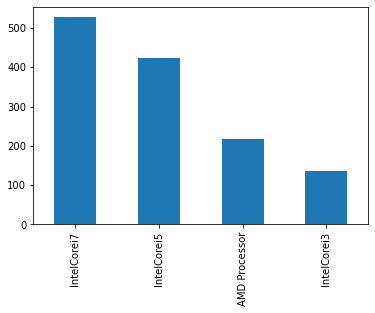

In [43]:
#value count on cpu brand column
data['CpuBrand'].value_counts().plot(kind='bar')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'IntelCorei5'),
  Text(1, 0, 'IntelCorei7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'IntelCorei3')])

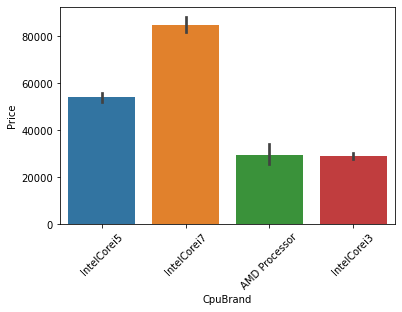

In [44]:
#compare cpubrand with price
sns.barplot(x=data['CpuBrand'],y=data['Price'])
plt.xticks(rotation= 45)

In [45]:
#drop cpu and cpuname columns
data.drop(columns=['Cpu','CpuName'],inplace=True)

In [46]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CpuBrand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,IntelCorei5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,IntelCorei5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,IntelCorei5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,IntelCorei7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,IntelCorei5


<AxesSubplot:>

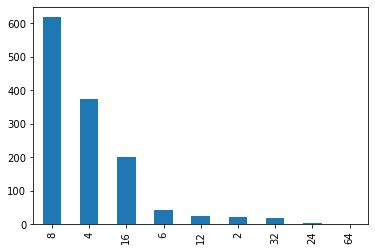

In [47]:
#ram column
data['Ram'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ram', ylabel='Price'>

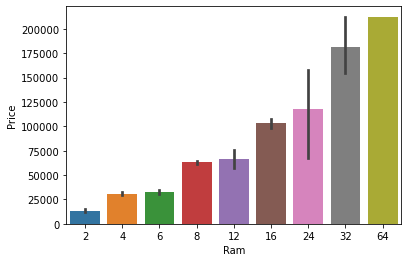

In [48]:
#compare ram and price
sns.barplot(x=data['Ram'],y=data['Price'])

In [49]:
#the memory column
data['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
256GB SSD +  500GB HDD             2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
512GB SSD +  256GB SSD             1
1

In [50]:
data['Memory'] = data['Memory'].astype(str).replace('\.0','',regex=True)
data['Memory']= data['Memory'].str.replace('GB','')
data['Memory'] = data['Memory'].str.replace('TB','000')
new = data['Memory'].str.split('+',n=1,expand=True)

data['first'] = new[0]
data['first'] = data['first'].str.strip()

data['second'] = new[1]
                        

data['Layer1HDD'] = data['first'].apply(lambda x: 1 if 'HDD' in x else 0)
data['Layer1SSD'] = data['first'].apply(lambda x: 1 if 'SSD' in x else 0)
data['Layer1Hybrid'] = data['first'].apply(lambda x : 1 if 'Hybrid' in x else 0)
data['Layer1Flash_storage'] = data['first'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

data['first'] = data['first'].str.replace(r'\D','')

data['second'].fillna('0',inplace=True)

data['Layer2HDD'] = data['second'].apply(lambda x: 1 if 'HDD' in x else 0)
data['Layer2SSD'] = data['second'].apply(lambda x: 1 if 'SSD' in x else 0) 
data['Layer2Hybrid'] = data['second'].apply(lambda x: 1 if 'Hybrid' in x else 0)
data['Layer2Flash_storage'] = data['second'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

data['second'] = data['second'].str.replace(r'\D','')

data['first'] = data['first'].astype(int)
data['second'] = data['second'].astype(int)

data['HDD'] = (data['first']*data['Layer1HDD']+data['second']*data['Layer2HDD'])
data['SSD'] = (data['first']*data['Layer1SSD']+data['second']*data['Layer2SSD'])
data['Hybrid'] = (data['first']*data['Layer1Hybrid']+data['second']*data['Layer2Hybrid'])
data['Flash_storage'] = (data['first']*data['Layer1Flash_storage']+data['second']*data['Layer2Flash_storage'])

data.drop(columns=['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_storage','Layer2HDD',
                   'Layer2SSD','Layer2Hybrid','Layer2Flash_storage'],inplace=True)



In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Ram            1303 non-null   int32  
 3   Memory         1303 non-null   object 
 4   Gpu            1303 non-null   object 
 5   OpSys          1303 non-null   object 
 6   Weight         1303 non-null   float32
 7   Price          1303 non-null   float64
 8   Touchscreen    1303 non-null   int64  
 9   IPS            1303 non-null   int64  
 10  PPI            1303 non-null   float64
 11  CpuBrand       1303 non-null   object 
 12  HDD            1303 non-null   int64  
 13  SSD            1303 non-null   int64  
 14  Hybrid         1303 non-null   int64  
 15  Flash_storage  1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(6), object(6)
memory usage: 152.8+ KB


In [52]:
data.head(20)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CpuBrand,HDD,SSD,Hybrid,Flash_storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,IntelCorei5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,IntelCorei5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,IntelCorei5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,IntelCorei7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,IntelCorei5,0,256,0,0
5,Acer,Notebook,4,500 HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,100.454670,AMD Processor,500,0,0,0
6,Apple,Ultrabook,16,256 Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,220.534624,IntelCorei7,0,0,0,256
7,Apple,Ultrabook,8,256 Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735.5360,0,0,127.677940,IntelCorei5,0,0,0,256
8,Asus,Ultrabook,16,512 SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,0,0,157.350512,IntelCorei7,0,512,0,0
9,Acer,Ultrabook,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,0,1,157.350512,IntelCorei5,0,256,0,0


In [53]:
#drop the memory column
data.drop(columns=['Memory'],inplace=True)


In [54]:
data.sample()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CpuBrand,HDD,SSD,Hybrid,Flash_storage
164,Acer,Notebook,4,Intel HD Graphics 500,Windows 10,2.1,18541.44,0,0,100.45467,AMD Processor,1000,0,0,0


In [55]:
data.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_storage   -0.040511
Name: Price, dtype: float64

In [56]:
data.drop(columns=['Hybrid','Flash_storage'],inplace=True)

In [57]:
data

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CpuBrand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,IntelCorei5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,IntelCorei5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,IntelCorei5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,IntelCorei7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,IntelCorei5,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,IntelCorei7,0,128
1299,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,IntelCorei7,0,512
1300,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,AMD Processor,0,0
1301,HP,Notebook,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,IntelCorei7,1000,0


In [58]:
#gpu column
data['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R3                1
AMD Radeon 540               1
AMD Radeon Pro 555           1
AMD Radeon R7 Graphics       1
Nvidia Quadro 3000M          1
Name: Gpu, Length: 110, dtype: int64

In [59]:
data['Gpu brand'] = data['Gpu'].apply(lambda x:x.split()[0])
data

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CpuBrand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,IntelCorei5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,IntelCorei5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,IntelCorei5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,IntelCorei7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,IntelCorei5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,IntelCorei7,0,128,Intel
1299,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,IntelCorei7,0,512,Intel
1300,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,AMD Processor,0,0,Intel
1301,HP,Notebook,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,IntelCorei7,1000,0,AMD


In [60]:
data['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [61]:
data= data[data['Gpu brand'] !='ARM']


In [62]:
data['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

<AxesSubplot:xlabel='Gpu brand', ylabel='Price'>

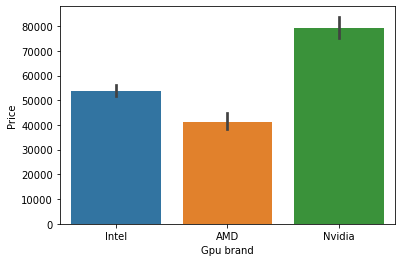

In [63]:
sns.barplot(x=data['Gpu brand'],y=data['Price'])

In [64]:
data.drop(columns=['Gpu'],inplace=True)

/home/christine/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [65]:
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CpuBrand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,IntelCorei5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,IntelCorei5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,IntelCorei5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,IntelCorei7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,IntelCorei5,0,256,Intel


In [66]:
#opsys column
data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Windows 10 S       8
Mac OS X           8
Android            2
Name: OpSys, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Windows 10'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Android'),
  Text(6, 0, 'Windows 10 S'),
  Text(7, 0, 'Chrome OS'),
  Text(8, 0, 'Windows 7')])

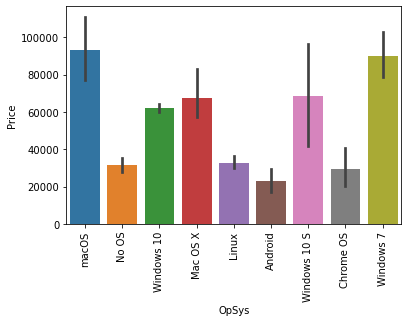

In [67]:
sns.barplot(x=data['OpSys'],y=data['Price'])
plt.xticks(rotation=90)

In [68]:
def cat_os(inp):
    if inp == 'Windows 19' or inp == 'Windows 7' or inp == 'Windows 10 s':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'



In [69]:
data['OS'] = data['OpSys'].apply(cat_os)

<ipython-input-69-47ea48491549>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['OS'] = data['OpSys'].apply(cat_os)


In [70]:
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CpuBrand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,IntelCorei5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,IntelCorei5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,IntelCorei5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,IntelCorei7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,IntelCorei5,0,256,Intel,Mac


In [71]:
data.drop(columns=['OpSys'],inplace=True)

/home/christine/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='OS', ylabel='Price'>

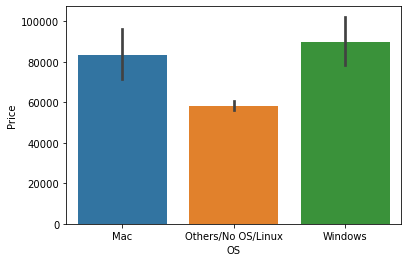

In [72]:
sns.barplot(x=data['OS'],y=data['Price'])

/home/christine/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

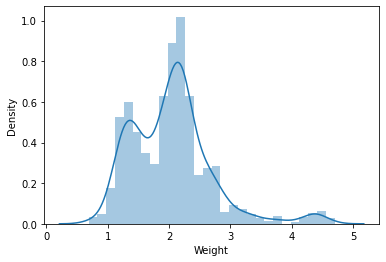

In [73]:
#weight column
sns.distplot(data['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Price'>

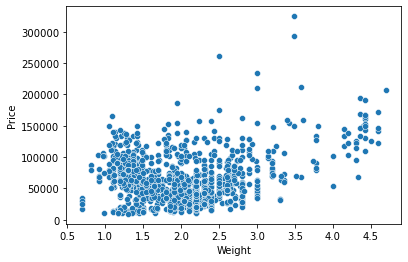

In [74]:
sns.scatterplot(x=data['Weight'],y=data['Price'])

In [75]:
data.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
IPS            0.253320
PPI            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<AxesSubplot:>

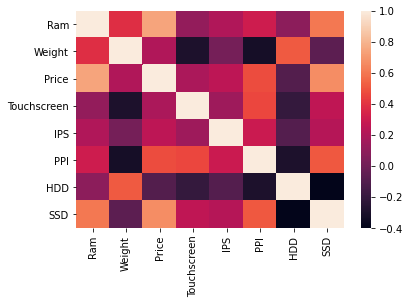

In [76]:
sns.heatmap(data.corr())

/home/christine/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

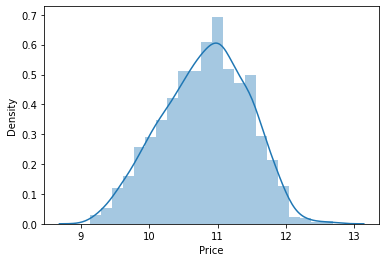

In [77]:
sns.distplot(np.log(data['Price']))

In [78]:
#split the data
X = data.drop(columns=['Price'])
y = np.log(data['Price'])

In [79]:
X

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,CpuBrand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983005,IntelCorei5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,IntelCorei5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,IntelCorei5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,IntelCorei7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,IntelCorei5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,IntelCorei7,0,128,Intel,Others/No OS/Linux
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,IntelCorei7,0,512,Intel,Others/No OS/Linux
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,AMD Processor,0,0,Intel,Others/No OS/Linux
1301,HP,Notebook,6,2.19,0,0,100.454670,IntelCorei7,1000,0,AMD,Others/No OS/Linux


In [80]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [82]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,CpuBrand,HDD,SSD,Gpu brand,OS
183,Toshiba,Notebook,8,2.00,0,0,100.454670,IntelCorei5,0,128,Intel,Others/No OS/Linux
1141,MSI,Gaming,8,2.40,0,0,141.211998,IntelCorei7,1000,128,Nvidia,Others/No OS/Linux
1049,Asus,Netbook,4,1.20,0,0,135.094211,AMD Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,IntelCorei3,1000,0,Intel,Others/No OS/Linux
878,Dell,Notebook,4,2.18,0,0,141.211998,IntelCorei5,1000,128,Nvidia,Others/No OS/Linux
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,IntelCorei3,500,0,Nvidia,Others/No OS/Linux
299,Asus,Ultrabook,16,1.63,0,0,141.211998,IntelCorei7,0,512,Nvidia,Others/No OS/Linux
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Others/No OS/Linux
527,Lenovo,Notebook,8,2.20,0,0,100.454670,IntelCorei3,2000,0,Nvidia,Others/No OS/Linux


## Linear Regression

In [87]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first')
                                         ,[0,1,7,10,11])],remainder='passthrough')
step2 = LinearRegression()
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('r2Score',r2_score(y_test,y_pred))
print('mae',mean_absolute_error(y_test,y_pred))

r2Score 0.7991804923803506
mae 0.21387620351957173


## Ridge Regression

In [89]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first')
                                         ,[0,1,7,10,11])],remainder='passthrough')
step2 = Ridge(alpha=10)
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)



y_pred = pipe.predict(X_test)

print('r2Score',r2_score(y_test,y_pred))
print('mae',mean_absolute_error(y_test,y_pred))

r2Score 0.8021473725889507
mae 0.21613481063552328


## Lasso Regression

In [90]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first')
                                         ,[0,1,7,10,11])],remainder='passthrough')
step2 = Lasso(alpha=0.001)
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('r2Score',r2_score(y_test,y_pred))
print('mae',mean_absolute_error(y_test,y_pred))

r2Score 0.7954187431425596
mae 0.21877154638223203


## KNN

In [91]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first')
                                         ,[0,1,7,10,11])],remainder='passthrough')
step2 = KNeighborsRegressor(n_neighbors=3)
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('r2Score',r2_score(y_test,y_pred))
print('mae',mean_absolute_error(y_test,y_pred))

r2Score 0.7742483880586406
mae 0.21284040545822452


## Decision Tree

In [92]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first')
                                         ,[0,1,7,10,11])],remainder='passthrough')
step2 = DecisionTreeRegressor(max_depth=8)
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('r2Score',r2_score(y_test,y_pred))
print('mae',mean_absolute_error(y_test,y_pred))

r2Score 0.8305286620186625
mae 0.19159454629565617


## SVM

In [94]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first')
                                         ,[0,1,7,10,11])],remainder='passthrough')
step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('r2Score',r2_score(y_test,y_pred))
print('mae',mean_absolute_error(y_test,y_pred))

r2Score 0.7913560295344506
mae 0.2121279836184853


## Random Forest

In [95]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first')
                                         ,[0,1,7,10,11])],remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('r2Score',r2_score(y_test,y_pred))
print('mae',mean_absolute_error(y_test,y_pred))

r2Score 0.8786932060421532
mae 0.16608707534497222


## Extra Trees

In [96]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first')
                                         ,[0,1,7,10,11])],remainder='passthrough')
step2 = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('r2Score',r2_score(y_test,y_pred))
print('mae',mean_absolute_error(y_test,y_pred))

r2Score 0.8742250754568107
mae 0.1624154733340513


## AdaBoost

In [97]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first')
                                         ,[0,1,7,10,11])],remainder='passthrough')
step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('r2Score',r2_score(y_test,y_pred))
print('mae',mean_absolute_error(y_test,y_pred))

r2Score 0.779049368076798
mae 0.23495441419238966


## Gradient Boost

In [98]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first')
                                         ,[0,1,7,10,11])],remainder='passthrough')
step2 = GradientBoostingRegressor(n_estimators=500)
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('r2Score',r2_score(y_test,y_pred))
print('mae',mean_absolute_error(y_test,y_pred))

r2Score 0.8762236381858497
mae 0.16420246233491745


## XgBoost

In [99]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first')
                                         ,[0,1,7,10,11])],remainder='passthrough')
step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('r2Score',r2_score(y_test,y_pred))
print('mae',mean_absolute_error(y_test,y_pred))

r2Score 0.8878542302820971
mae 0.1597180754697832


## Voting Regressor

In [101]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first')
                                         ,[0,1,7,10,11])],remainder='passthrough')

rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=5)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
lr = LinearRegression()
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf',rf),('gbdt',gbdt),('xgb',xgb),('et',et)],weights=[5,1,1,1])

pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

print('r2score',r2_score(y_test,y_pred))
print('mae',mean_absolute_error(y_test,y_pred))








r2score 0.8613695042084673
mae 0.18409249975991504


### Exporting the model

In [106]:
pickle.dump(data,open('data.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))